In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
from pandas.api.types import CategoricalDtype
import glob

sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks")

def LoadData(base_dir):
    search_string="/rerun*.csv"
    dfs = []
    print("opening the followin files:")
    for filename in glob.glob(base_dir+search_string, recursive=True):
        print(filename)
        df = pd.read_csv(filename, index_col=None, header=0, skipinitialspace=True)
        dfs.append(df)
        df = pd.concat(dfs, axis=0, ignore_index=True)
    return df
    
###### LOAD DATA ############
baseline='./data'
df=LoadData(baseline)

df = df.rename(columns={'resolution r': 'resolution r [m]'})
df['for_copy'] = df.apply (lambda row: "{:2.2f}".format(row["Trans.err.(%)"])+"/"+"{:2.2f}".format(row["Rot.err.(deg/100m)"]) , axis=1)
df['for_copy_ATE'] = df.apply (lambda row: "{:2.2f}".format(row["RPE(m)"])+"/"+"{:2.2f}".format(row["ATE(m)"]) , axis=1)


opening the followin files:
./data/rerun_mulranbaseline-cfear-2_2022-05-24_1425_eval.csv
./data/rerun_mulranbaseline-cfear-3-s50_2022-05-24_1425_eval.csv
./data/rerun_mulranbaseline-cfear-1_2022-05-24_1425_eval.csv
./data/rerun_oxfordbaseline-cfear-1_2022-05-24_1425_eval.csv
./data/rerun_oxfordbaseline-cfear-2-p2d_2022-05-24_1425_eval.csv
./data/rerun_mulranbaseline-cfear-3-s50-p2d_2022-05-24_1425_eval.csv
./data/rerun_oxfordbaseline-cfear-2_2022-05-24_1425_eval.csv
./data/rerun_oxfordbaseline-cfear-3-s10-p2d_2022-05-24_1425_eval.csv
./data/rerun_oxfordbaseline-cfear-3-s50_2022-05-24_1425_eval.csv
./data/rerun_mulranbaseline-cfear-2-p2d_2022-05-24_1425_eval.csv
./data/rerun_oxfordbaseline-cfear-3-s50-p2d_2022-05-24_1425_eval.csv
./data/rerun_mulranbaseline-cfear-3-p2d_2022-05-24_1425_eval.csv
./data/rerun_oxfordbaseline-cfear-1-p2d_2022-05-24_1425_eval.csv
./data/rerun_oxfordbaseline-cfear-3-p2d_2022-05-24_1425_eval.csv
./data/rerun_mulranbaseline-cfear-3-s10_2022-05-24_1425_eval.csv
.

In [6]:
## USE EITHER ## 
## MULRAN     ##
df=df[df["dataset"]=="mulran"]
cat_size_order = CategoricalDtype(
    ['KAIST01','KAIST02','KAIST03','DCC01','DCC02','DCC03','Riverside01','Riverside02','Riverside03'], 
    ordered=True
)
df['sequence'] = df["sequence"].astype(cat_size_order)
df=df.sort_values('sequence')
##############################

In [11]:
####  OR     ####
####  OXFORD ####
df=df[df["dataset"]=="oxford"]
df['sequence'] = df.apply (lambda row: str(row["sequence"])[8:-20], axis=1)
cat_size_order = CategoricalDtype(
    ["10-12-32", "16-13-09", "17-13-26", "18-14-14", "18-15-20", "10-11-46", "16-11-53","18-14-46"], 
    ordered=True
)
df['sequence'] = df["sequence"].astype(cat_size_order)
df=df.sort_values(['sequence','method'])
##############################


      

['baseline-cfear-3' 'baseline-cfear-1' 'baseline-cfear-3-p2d'
 'baseline-cfear-2' 'baseline-cfear-3-s10' 'baseline-cfear-3-s50-p2d'
 'baseline-cfear-3-s10-p2d' 'baseline-cfear-2-p2d' 'baseline-cfear-1-p2d'
 'baseline-cfear-3-s50']

-----------------------------------------------
Odometry drift [translaton/rotaiton]
Average time per frame [ms]
Sequences: KAIST01 & KAIST02 & KAIST03 & DCC01 & DCC02 & DCC03 & Riverside01 & Riverside02 & Riverside03
baseline-cfear-3: odometry error: 1.59/0.66 & 1.62/0.66 & 1.73/0.78 & 2.28/0.54 & 1.49/0.46 & 1.47/0.48 & 1.59/0.63 & 1.39/0.51 & 1.41/0.40 & mean: 1.62/0.57
baseline-cfear-3: registration: 22.49ms, filtering: nanms, total: nanms, framerate: nanHz
baseline-cfear-1: odometry error: 2.62/0.97 & 2.45/0.90 & 2.85/1.08 & 2.73/0.73 & 1.82/0.60 & 1.77/0.62 & 2.55/0.90 & 2.71/0.82 & 3.56/0.82 & mean: 2.56/0.83
baseline-cfear-1: registration: 3.48ms, filtering: nanms, total: nanms, framerate: nanHz
baseline-cfear-3-p2d: odometry error: 1.53/0.66 & 1.54/

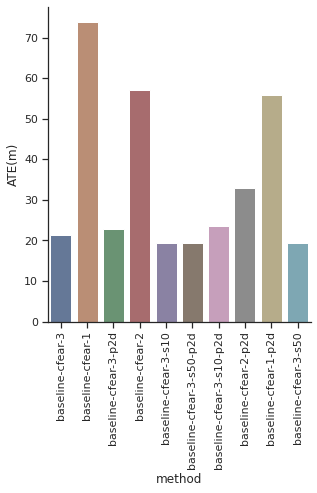

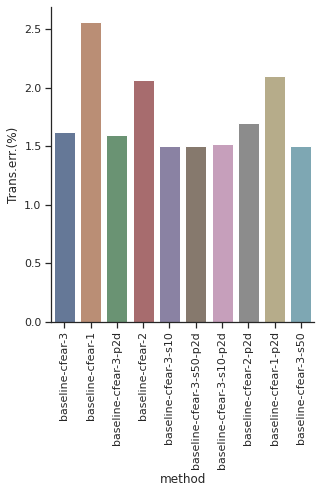

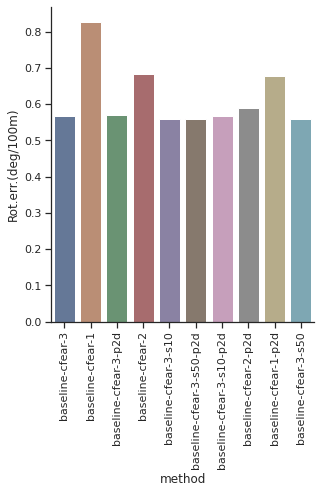

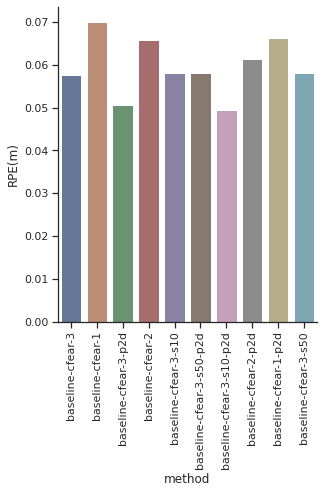

In [9]:


g = sns.catplot(x="method", y="ATE(m)",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=90)

g = sns.catplot(x="method", y="Trans.err.(%)",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=90)


g = sns.catplot(x="method", y="Rot.err.(deg/100m)",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=90)

g = sns.catplot(x="method", y="RPE(m)",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=90)


#print("Sequences: " + ", ".join(df["sequence"].values))

#methods=["cfear1", "cfear2", "cfear3", "cfear3-p2l", "cfear-1", "cfear-2", "cfear-3", "cfear-3-p2l"]
methods=df['method'].unique()
print(methods)
#methods=["cfear-1"]
#print(df["method"])
print("\n-----------------------------------------------")
print("Odometry drift [translaton/rotaiton]")
print("Average time per frame [ms]")
for method in [methods[0]]:
    dfm=df[df["method"]==method]
    print("Sequences: "+" & ".join(dfm["sequence"].values) )
for method in methods:
    dfm=df[df["method"]==method]
    if(dfm.shape[0]>0):
        trans_mean = "{:2.2f}".format(dfm["Trans.err.(%)"].mean())
        rot_mean = "{:2.2f}".format(dfm["Rot.err.(deg/100m)"].mean())
        reg_time = "{:2.2f}ms".format(dfm["Registration avg"].mean())
        filtering_time = "{:2.2f}ms".format(dfm["time-Filtering avg"].mean())
        total = "{:2.1f}ms".format(dfm["time-Filtering avg"].mean() + dfm["Registration avg"].mean())
        framerate = "{:2.1f}Hz".format(1000.0/(dfm["time-Filtering avg"].mean() + dfm["Registration avg"].mean()))
        print(method + ": odometry error: "+" & ".join(dfm["for_copy"].values) + " & mean: " + trans_mean + "/" + rot_mean)
        print(method + ": registration: " + reg_time + ", filtering: " + filtering_time + ", total: " + total + ", framerate: " + framerate)
print("-----------------------------------------------\n")
print("RPE (Mean) and ATE (RMSE)\n")
for method in methods:
    dfm=df[df["method"]==method]
    if(dfm.shape[0]>0):
        ate_mean = "{:2.2f}".format(dfm["ATE(m)"].mean())
        rpe_mean = "{:2.2f}".format(100*dfm["RPE(m)"].mean())
        print(method+ ": RPE/ATE: " + " & ".join(dfm["for_copy_ATE"].values) + " & mean: " + rpe_mean + "/" + ate_mean)